In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, normaltest

In [30]:
df = pd.read_csv("C:/Users/arunj/Downloads/house_price.csv") 


In [31]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [32]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [33]:
df['price_per_sqft'].describe()


count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [36]:
# Q2: Detect and Remove Outliers
# a) Mean and Standard Deviation Method
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
df_mean_std = df[(df['price_per_sqft'] > (mean - 3 * std)) & (df['price_per_sqft'] < (mean + 3 * std))]


In [37]:
df_mean_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [38]:
# b) Percentile Method (5th–95th Percentile)
lower = df['price_per_sqft'].quantile(0.05)
upper = df['price_per_sqft'].quantile(0.95)
df_percentile = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]


In [62]:
# c) IQR (Interquartile Range) Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_iqr = df[(df['price_per_sqft'] >= lower_bound) & 
            (df['price_per_sqft'] <= upper_bound)]


In [63]:
#  d) Z-Score Method
from scipy import stats
z_scores = stats.zscore(df['price_per_sqft'])
df_zscore = df[(abs(z_scores) < 3)]


In [64]:
print("Original:", len(df))
print("Mean-Std Dev:", len(df_mean_std))
print("Percentile:", len(df_percentile))
print("IQR:", len(df_iqr))
print("Z-Score:", len(df_zscore))


Original: 13200
Mean-Std Dev: 13195
Percentile: 11880
IQR: 11935
Z-Score: 13195


In [65]:
# Q3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine cleaned versions into one dictionary
boxplot_data = {
    'Original': df['price_per_sqft'],
    'Mean-Std': df_mean_std['price_per_sqft'],
    'Percentile': df_percentile['price_per_sqft'],
    'IQR': df_iqr['price_per_sqft'],
    'Z-Score': df_zscore['price_per_sqft']
}

# Convert to DataFrame for plotting
boxplot_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in boxplot_data.items()]))


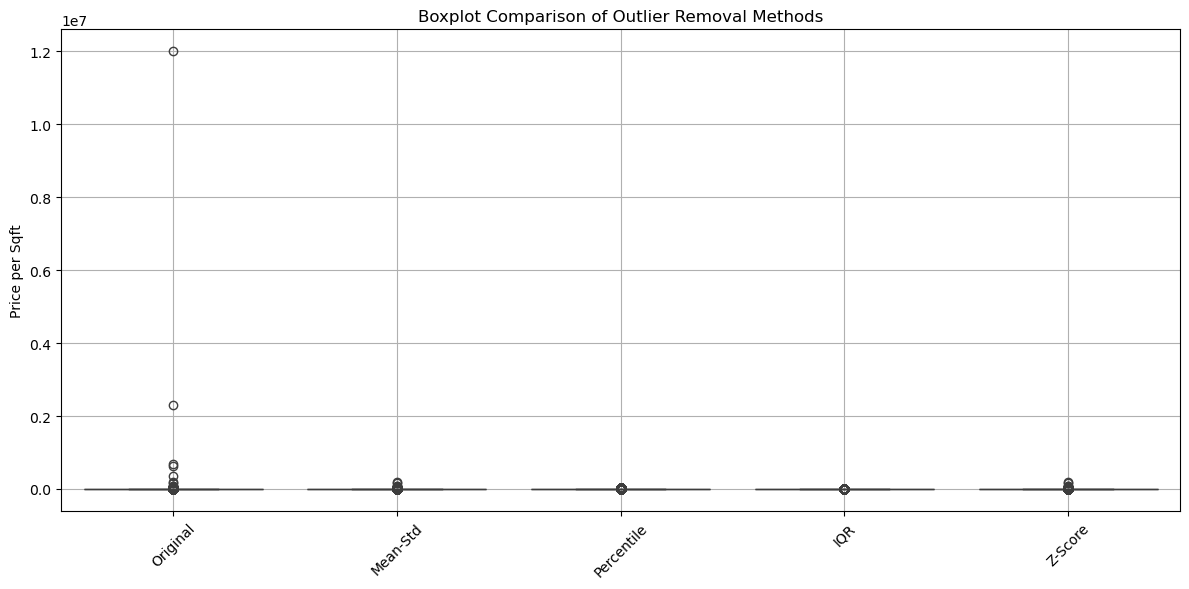

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=boxplot_df)
plt.title("Boxplot Comparison of Outlier Removal Methods")
plt.ylabel("Price per Sqft")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
plt.savefig("q3_boxplot.png")


<Figure size 640x480 with 0 Axes>

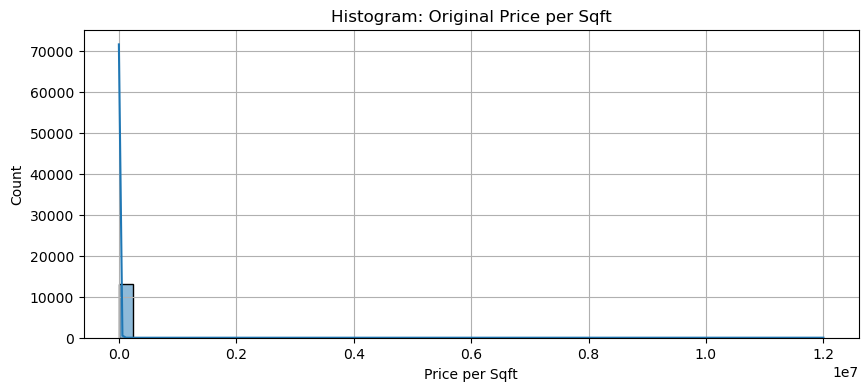

In [68]:
# Q4: Draw Histplot to Check the Normality of the Column (price_per_sqft) and Perform Transformations if Needed. Check the Skewness and Kurtosis Before and After the Transformation. 
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE for original data
plt.figure(figsize=(10, 4))
sns.histplot(df['price_per_sqft'], kde=True, bins=50)
plt.title("Histogram: Original Price per Sqft")
plt.xlabel("Price per Sqft")
plt.grid(True)
plt.show()


In [70]:
# Check Skewness and Kurtosis (Before)


skew_before = df['price_per_sqft'].skew()
kurt_before = df['price_per_sqft'].kurt()

print("Skewness (before):", skew_before)
print("Kurtosis (before):", kurt_before)


Skewness (before): 108.28105529705168
Kurtosis (before): 12095.21502832288


In [72]:
# Apply Log Transformation

df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])  # log(1 + x) to handle 0


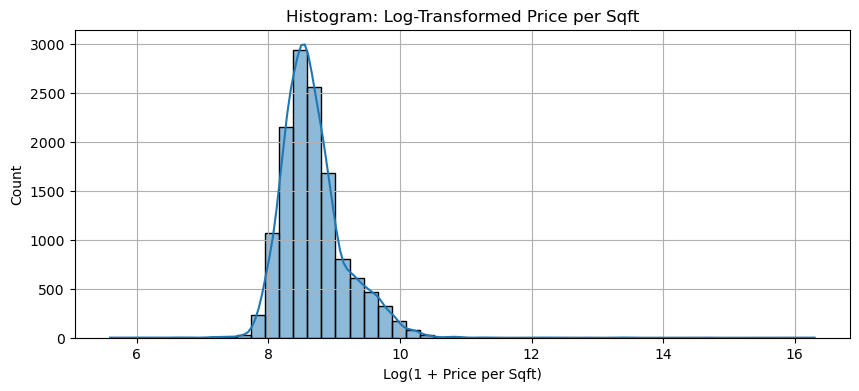

In [73]:
# Plot Histogram After Transformation
plt.figure(figsize=(10, 4))
sns.histplot(df['price_per_sqft_log'], kde=True, bins=50)
plt.title("Histogram: Log-Transformed Price per Sqft")
plt.xlabel("Log(1 + Price per Sqft)")
plt.grid(True)
plt.show()



In [74]:
skew_after = df['price_per_sqft_log'].skew()
kurt_after = df['price_per_sqft_log'].kurt()

print("Skewness (after):", skew_after)
print("Kurtosis (after):", kurt_after)


Skewness (after): 1.4004850530059296
Kurtosis (after): 9.206942162860814


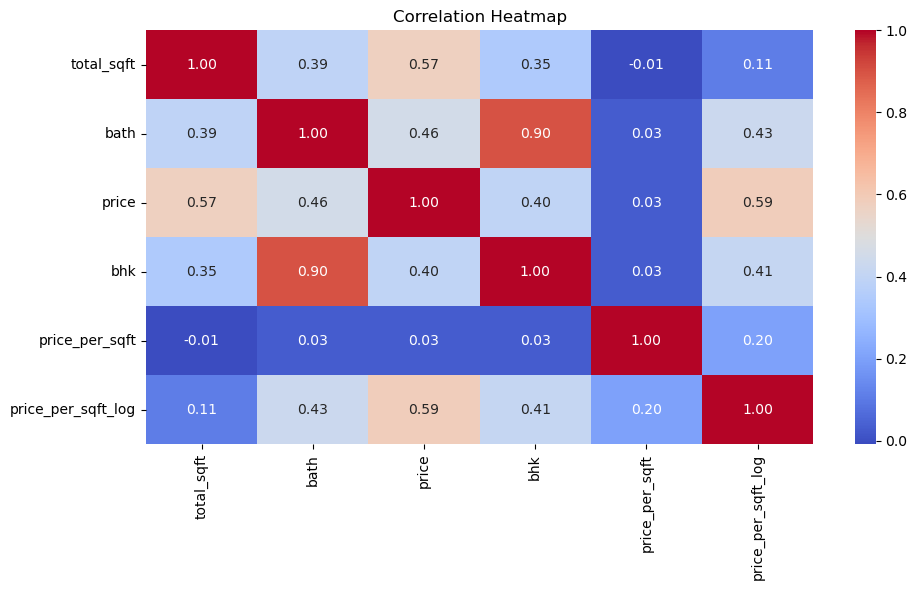

In [75]:
# Q5: Check the Correlation Between All the Numerical Columns and Plot a Heatmap
# Select numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


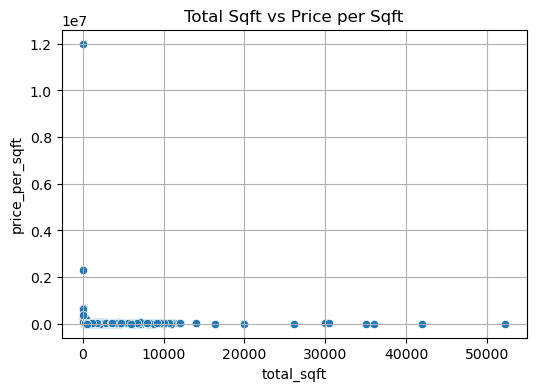

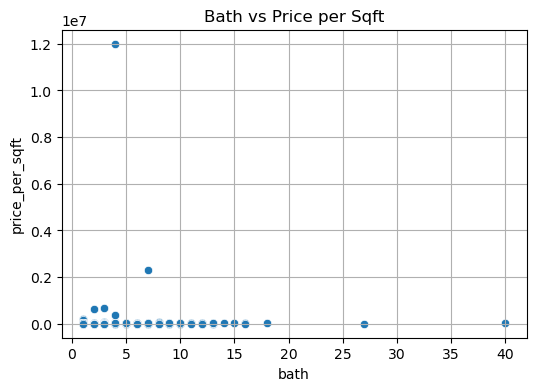

In [ ]:
# Q6: Scatter plot
# Scatter plot: total_sqft vs price_per_sqft
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=df)
plt.title("Total Sqft vs Price per Sqft")
plt.grid(True)
plt.show()

# Scatter plot: bath vs price_per_sqft
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bath', y='price_per_sqft', data=df)
plt.title("Bath vs Price per Sqft")
plt.grid(True)
plt.show()

# Scatter plot: bhk vs price_per_sqft
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bhk', y='price_per_sqft', data=df)
plt.title("BHK vs Price per Sqft")
plt.grid(True)
plt.show()

# Scatter plot: price vs price_per_sqft
plt.figure(figsize=(6, 4))
sns.scatterplot(x='price', y='price_per_sqft', data=df)
plt.title("Price vs Price per Sqft")
plt.grid(True)
plt.show()
